In [1]:
# Importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

c:\Users\Namitha john\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


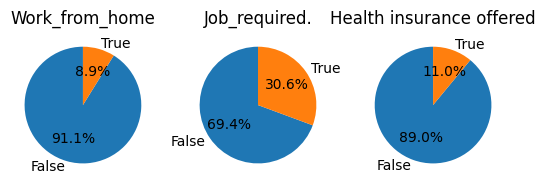

In [8]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work_from_home',
    'job_no_degree_mention': 'Job_required.',
    'job_health_insurance': 'Health insurance offered'
}

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle = 90, autopct='%1.1f%%', labels = ['False','True'])
    ax[i].set_title(title)
    

In [14]:
df = df[df['job_title_short'] == 'Data Analyst']
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)

skill_stats = skill_stats.sort_values(by='skill_count',ascending = False).head(10)

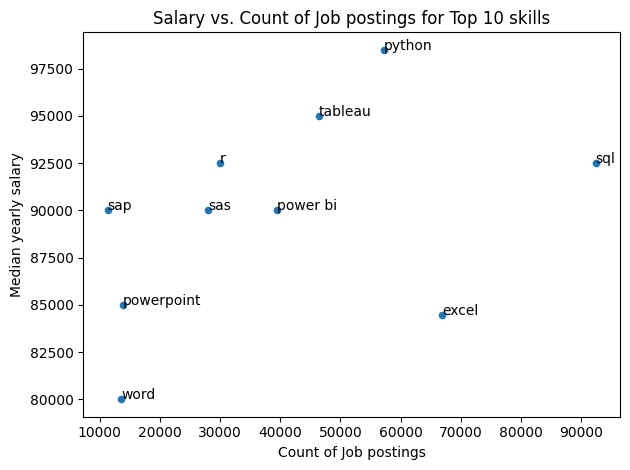

In [17]:
skill_stats.plot(kind = 'scatter',x = 'skill_count', y= 'median_salary')
plt.xlabel('Count of Job postings')
plt.ylabel('Median yearly salary')
plt.title('Salary vs. Count of Job postings for Top 10 skills')
plt.tight_layout()

for i,text in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],text)